In [11]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
from struct import unpack
%matplotlib inline
from scipy.signal import decimate

In [3]:
bod_num=[]
mass=[]
time=[]
ax=[]
ex=[]
inc=[]
x=[]
y=[]
z=[]

f = open("/Users/aribakhan/Documents/BH_nbody/OutputData/May22/bout.bin", "rb")
num=17 #number of columns
vals=[1,2,3,4,5]
while len(vals)>0:
    vals = f.read(4*num)
    if len(vals)>0:
        bod_num.append(unpack('f'*num,vals)[1])
        mass.append(unpack('f'*num,vals)[2])
        time.append(unpack('f'*num,vals)[3])
        ax.append(unpack('f'*num,vals)[4])
        ex.append(unpack('f'*num,vals)[5])
        inc.append(unpack('f'*num,vals)[6])
        x.append(unpack('f'*num,vals)[10])
        y.append(unpack('f'*num,vals)[11])
        z.append(unpack('f'*num,vals)[12])
    if unpack('f'*num,vals)[3]>1e7:
        break
f.close()

x=np.array(x)
y=np.array(y)
z=np.array(z)
bod_num=np.array(bod_num)
mass=np.array(mass)
time=np.array(time)
r=np.sqrt(x**2+y**2+z**2)


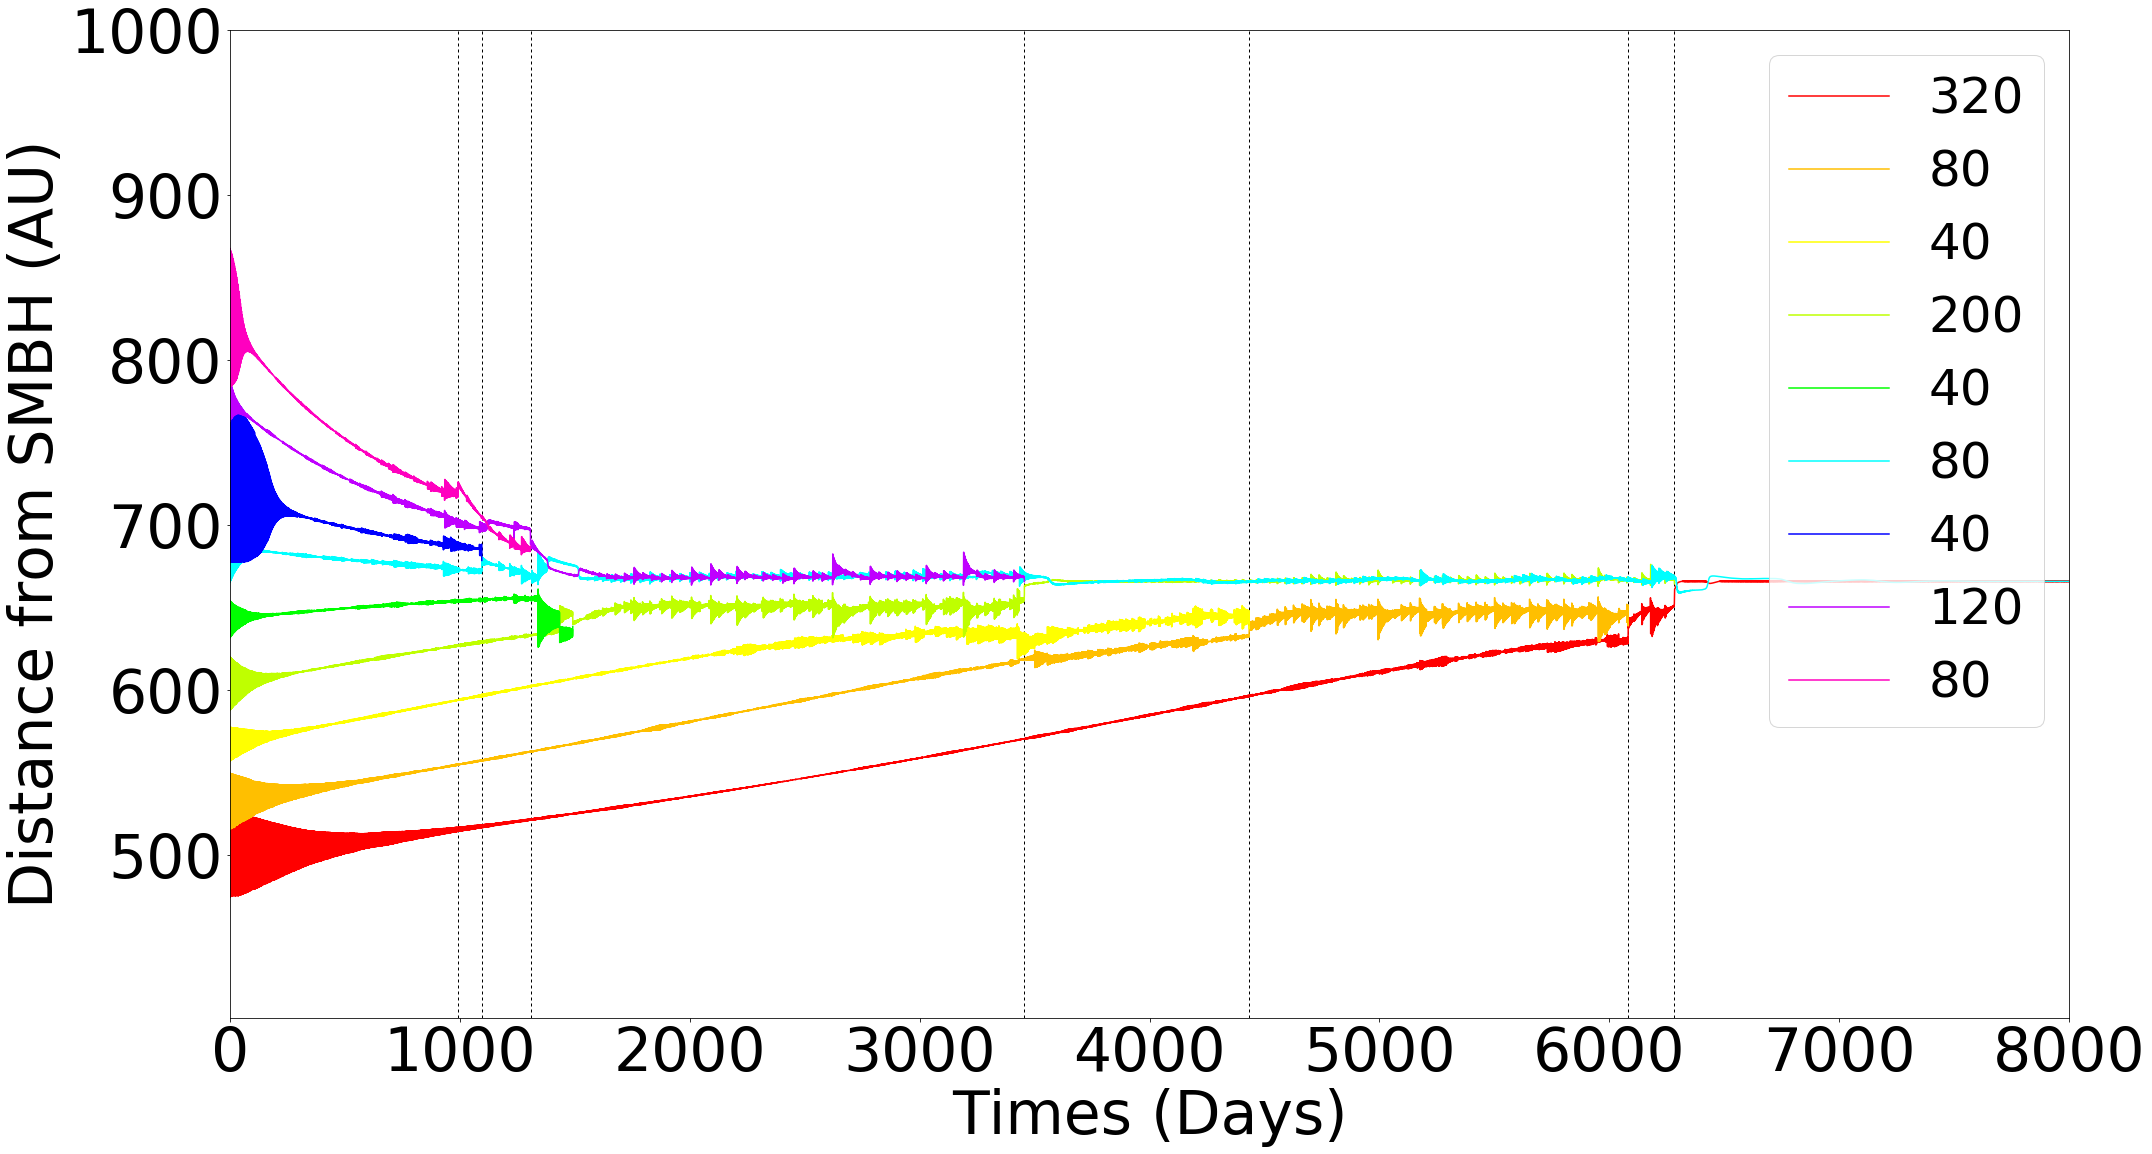

In [4]:
lsize=60

fig=plt.figure(figsize = (30,30))#initiates a figure

collisions = [362859,400357,477752,1.26209e+06,1.61905e+06,2.22097e+06,2.29449e+06]
collisions = np.array(collisions)/365.2
colors = [(1, 0, 0), (1, 0.749, 0), (1, 1, 0), (0.749, 1, 0), (0, 1, 0), (0, 1, 1), (0, 0, 1),(0.749, 0, 1), (1, 0, 0.749),(0.525, 0.475, 0.475)]
colors = np.array(colors)

#First Subplot
plt.subplot(2,1,1)
for i in collisions:
    axvline(i, color = 'k', linewidth=1, dashes = (3,3))
plt.plot()
#plt.title("General Plot")
plt.ylabel('Distance from SMBH (AU)',fontsize=lsize)
plt.xlabel('Times (Days)',fontsize=lsize)
#plt.xlabel('Time (Years)',fontsize=15)
plt.ylim(401,1000)
plt.xlim(0,8000)
for i in range(9): #range is a list of numbers from 0 to 9 (so 10 numbers total)
    obj=bod_num==i #boolean indexing
    plt.plot(time[obj]/365.2,r[obj],c=colors[i],label="%d"%mass[obj][-1]) #colors[i]
plt.legend(bbox_to_anchor=(1, .85), bbox_transform=plt.gcf().transFigure)
plt.legend(fontsize=50)
plt.gca().tick_params(labelsize=lsize)
plt.tight_layout()
#plt.savefig('May22_Plots/10body_may22.png') #savefigure

In [18]:
'''
...statements...
''' and None
'''
# (1) Decide the times at which you want to sample the data
ind_end = len(time_1_object)-1
duration_data = time_1_object[ind_end]
print('data duration = ', str(duration_data))
t_start = 0
t_end = time_1_object[ind_end] 
n_notes = 100
times = np.linspace(t_start,t_end,n_notes)

# stretch or shrink time, for the duration of the score-- 
# but you'll see why we need to keep the original times... 

stretch = 0.2
times_sco = times*stretch
print('score duration = ', str(times_sco[-1]))
dt = times_sco[2]-times_sco[1]
print(dt)
'''

"\n# (1) Decide the times at which you want to sample the data\nind_end = len(time_1_object)-1\nduration_data = time_1_object[ind_end]\nprint('data duration = ', str(duration_data))\nt_start = 0\nt_end = time_1_object[ind_end] \nn_notes = 100\ntimes = np.linspace(t_start,t_end,n_notes)\n\n# stretch or shrink time, for the duration of the score-- \n# but you'll see why we need to keep the original times... \n\nstretch = 0.2\ntimes_sco = times*stretch\nprint('score duration = ', str(times_sco[-1]))\ndt = times_sco[2]-times_sco[1]\nprint(dt)\n"

In [5]:
#make pandas dataframe
import pandas as pd
bh_df = pd.DataFrame({'bod_num':bod_num,'x':x,'y':y,'z':z,'r':r,'mass':mass,'time':time,'ax':ax,'ex':ex, 'inc':inc})
print(bh_df)

                 ax  bod_num        ex       inc   mass           r  \
0        500.000153      0.0  0.051502  0.004999   40.0  525.368260   
1        532.391479      1.0  0.032007  0.078029   40.0  523.930916   
2        566.881348      2.0  0.018161  0.007917   40.0  558.021028   
3        603.605652      3.0  0.027264  0.062389   40.0  600.897350   
4        642.708923      4.0  0.017914  0.066380   40.0  645.370984   
5        684.345398      5.0  0.028731  0.000000   40.0  703.949405   
6        728.679443      6.0  0.070612  0.070859   40.0  677.303354   
7        775.885010      7.0  0.017576  0.064417   40.0  773.127719   
8        826.148804      8.0  0.051525  0.006033   40.0  851.528267   
9        879.669128      9.0  0.033857  0.029966   40.0  909.123316   
10       500.000305      0.0  0.051502  0.004999   40.0  525.291939   
11       532.391541      1.0  0.032006  0.078028   40.0  524.168703   
12       566.881287      2.0  0.018161  0.007917   40.0  558.098349   
13    

In [16]:
#distance_over_time = bh_df[['bod_num','time', 'x', 'y', 'z']]
#print(distance_over_time)

In [7]:
select_time = distance_over_time.loc[5370:11620] #950 years to 2000 years
select_bodyNtime = select_time.loc[(select_time['bod_num'] >= 0) & (select_time['bod_num'] <=5)]
print(select_bodyNtime )                                           
#print(np.array(select_time))

       bod_num         time           x           y         z
5370       0.0   953.096191  480.325348   63.311848  0.005453
5371       1.0   953.096191 -409.218109 -347.058655 -0.470895
5372       2.0   953.096191 -191.428635 -522.943726 -0.071791
5373       3.0   953.096191 -618.662659   25.799067  0.028258
5374       4.0   953.096191  -16.179234 -647.094177 -0.740355
5375       5.0   953.096191 -307.165344  591.853333  0.004880
5380       0.0   954.915894  477.650208   77.511009  0.006688
5381       1.0   954.915894 -400.700317 -357.475098 -0.485023
5382       2.0   954.915894 -178.817017 -527.416260 -0.072406
5383       3.0   954.915894 -618.977356   13.385812  0.014862
5384       4.0   954.915894   -3.927231 -647.474548 -0.740781
5385       5.0   954.915894 -317.953247  585.994873  0.004837
5390       0.0   956.192200  475.527405   87.430794  0.007552
5391       1.0   956.192200 -394.574432 -364.646362 -0.494749
5392       2.0   956.192200 -169.910507 -530.374817 -0.072812
5393    

In [17]:
bod_num0 = select_time.loc[select_time ['bod_num'] == 0] 
bod_num1 = select_time.loc[select_time ['bod_num'] == 1] 
bod_num2 = select_time.loc[select_time ['bod_num'] == 2] 
bod_num3 = select_time.loc[select_time ['bod_num'] == 3] 
bod_num4 = select_time.loc[select_time ['bod_num'] == 4] 
bod_num5 = select_time.loc[select_time ['bod_num'] == 5] 

In [18]:
combineBodNum_0_5 = pd.concat([bod_num0,bod_num1,bod_num2,bod_num3,bod_num4,bod_num5], axis=0)
print(combineBodNum_0_5)

       bod_num         time           x           y         z
5370       0.0   953.096191  480.325348   63.311848  0.005453
5380       0.0   954.915894  477.650208   77.511009  0.006688
5390       0.0   956.192200  475.527405   87.430794  0.007552
5400       0.0   957.199158  473.709564   95.230759  0.008230
5410       0.0   958.531860  471.109802  105.515259  0.009125
5420       0.0   960.091919  467.787231  117.490685  0.010167
5430       0.0   961.324524  464.949524  126.900009  0.010986
5440       0.0   962.299072  462.573761  134.303345  0.011630
5450       0.0   963.329346  459.935730  142.093170  0.012308
5460       0.0   965.047729  455.247772  154.995895  0.013431
5470       0.0   965.919556  452.732361  161.496368  0.013997
5480       0.0   966.980042  449.549194  169.358932  0.014681
5490       0.0   968.216187  445.668549  178.459503  0.015473
5500       0.0   969.128662  442.687073  185.130600  0.016054
5510       0.0   969.932983  439.976990  190.977112  0.016562
5520    

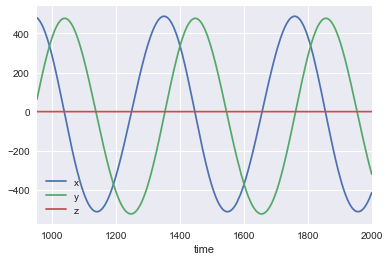

In [128]:
#bod_num0.plot(kind='line')
#plt.show()
#bp = bod_num0.line(column=['time','x'])
#plt.show()
bod_num0.plot(x='time', y= ['x', 'y', 'z'])


In [ ]:
bod_num0.to_pickle(, compression='infer', protocol=4)